# 1. Data Description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
training = pd.read_csv('datasets/train.csv')
testing = pd.read_csv('datasets/test.csv')

In [3]:
training.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
testing.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

# Data Visualization

In [5]:
null_counts = training.isnull().sum() #count the number of null values
print(null_counts)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
training.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Combined Data Analysis

In [7]:
df = pd.concat([training,testing])
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [9]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  12700.000000  12707.000000  12681.000000  12664.000000  12686.000000   
mean      28.771969    222.897852    451.961675    174.906033    308.476904   
std       14.387261    647.596664   1584.370747    590.558690   1130.279641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.000000      0.000000      0.000000      0.000000      0.000000   
50%       27.000000      0.000000      0.000000      0.000000      0.000000   
75%       38.000000     49.000000     77.000000     29.000000     57.000000   
max       79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count  12702.000000  
mean     306.789482  
std     1180.097223  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       42.000000  
max    24133.000000

In [10]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

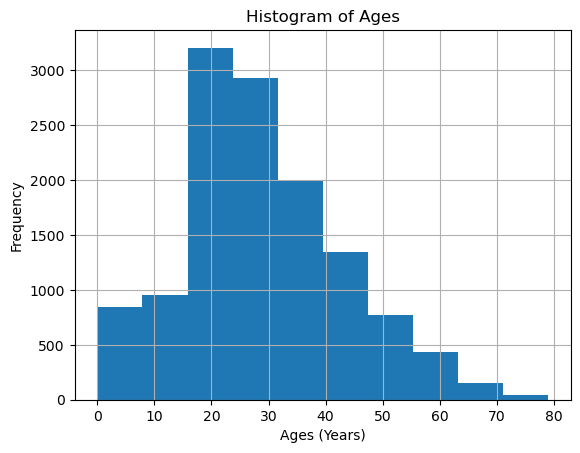

In [11]:
#Age Distribution
df['Age'].hist(bins=10)
plt.title("Histogram of Ages")
plt.xlabel('Ages (Years)')
plt.ylabel('Frequency')
plt.savefig('figures/age_distribution.png')

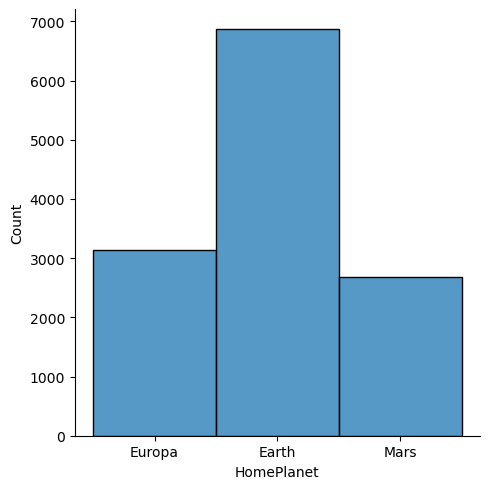

In [12]:
sns.displot(df['HomePlanet'])

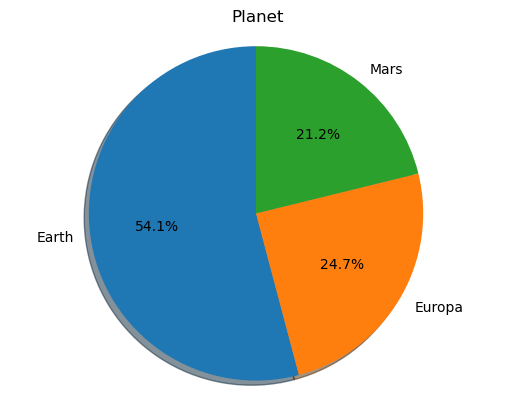

In [13]:
home_count = df['HomePlanet'].value_counts()
home_percent = home_count / len(training)
sizes = home_percent.values*100

labels = ["Earth", "Europa", "Mars"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Planet')
plt.savefig('figures/planet_pie_chart.png')
plt.show() 

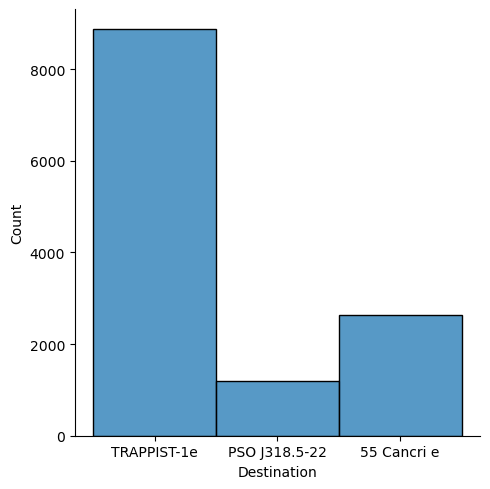

In [14]:
sns.displot(df['Destination'])

In [15]:
destination_count = df['Destination'].value_counts()
destination_count

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [16]:
labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"]

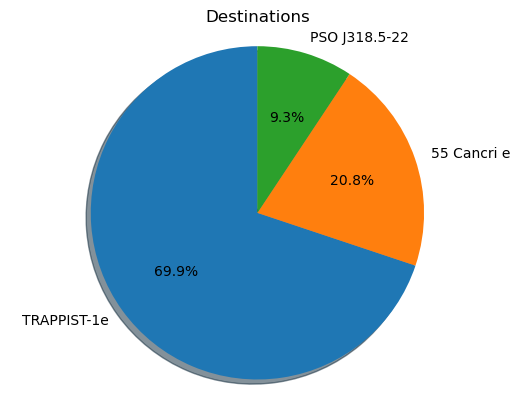

In [17]:
destination_percent = destination_count / len(df)
sizes = destination_percent.values*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Destinations')
plt.savefig('figures/destination_pie_chart.png')
plt.show() 

In [18]:
all_features = df.keys()
all_features

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [19]:
selected_features = all_features[1:-2:]
selected_features

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

<AxesSubplot:>

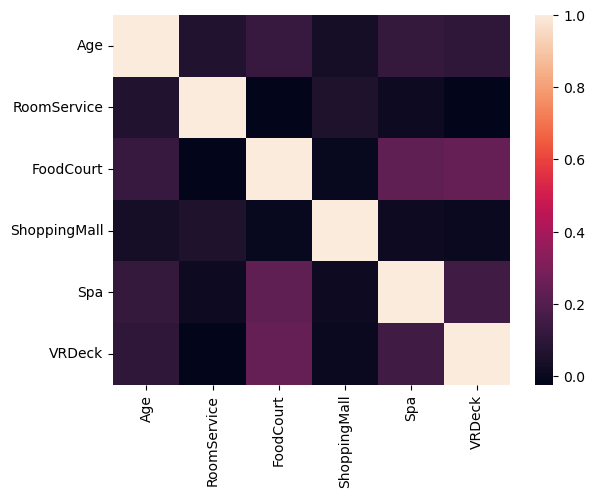

In [20]:
matrix = df[selected_features].corr()
sns.heatmap(matrix)

# Machine Learning Part

In [21]:
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
4272          0.0        0.0           0.0     0.0     0.0        Jeron Peter   
4273          0.0      847.0          17.0    10.0   144.0      Matty Scheron   
4274          0.0        0.0           0.0     0.0     0.0        Jayrin Pore   
4275          0.0     2680.0           0.0     0.0   523.0     Kitakan Conale   
4276          0.0        0.0           0.0     0.0     0.0   Lilace Leonzaley   

     Transported  
0          False  
1           True  
2          False  
3          False  
4           True  
...          ...  
4272         NaN  
4273         NaN  
4274         NaN  
4275         NaN  
4276         NaN  

[12970 rows x 14 columns]

In [22]:
drop = ["PassengerId", "Cabin", "Name"]
train_cabinnum = training["Cabin"]
test_cabinnum = testing["Cabin"]

train_df = training.drop(drop, axis=1)
test_df = testing.drop(drop, axis=1)

In [23]:
train_df.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [24]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].mean(), inplace=True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean(), inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].mean(), inplace=True)


train_df['CryoSleep'].replace({False:0,True:1},inplace=True)
train_df['CryoSleep'].fillna(0,inplace=True)
train_df['VIP'].replace({False:0,True:1},inplace=True)
train_df['VIP'].fillna(0,inplace=True)

train_df['Transported'].replace({False:0,True:1},inplace=True)


train_df['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2,'nan':3},inplace=True)
train_df['HomePlanet'].fillna(3,inplace=True)

train_df['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2,'nan':3},inplace=True)
train_df['Destination'].fillna(3,inplace=True)

train_df['RoomService'].fillna(train_df['RoomService'].mean(),inplace=True)

train_df

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0            0.0        0.0          0.0  39.0  0.0          0.0        0.0   
1            1.0        0.0          0.0  24.0  0.0        109.0        9.0   
2            0.0        0.0          0.0  58.0  1.0         43.0     3576.0   
3            0.0        0.0          0.0  33.0  0.0          0.0     1283.0   
4            1.0        0.0          0.0  16.0  0.0        303.0       70.0   
...          ...        ...          ...   ...  ...          ...        ...   
8688         0.0        0.0          2.0  41.0  1.0          0.0     6819.0   
8689         1.0        1.0          1.0  18.0  0.0          0.0        0.0   
8690         1.0        0.0          0.0  26.0  0.0          0.0        0.0   
8691         0.0        0.0          2.0  32.0  0.0          0.0     1049.0   
8692         0.0        0.0          0.0  44.0  0.0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported  
0              0.0     0.0     0.0            0  
1             25.0   549.0    44.0            1  
2              0.0  6715.0    49.0            0  
3            371.0  3329.0   193.0            0  
4            151.0   565.0     2.0            1  
...            ...     ...     ...          ...  
8688           0.0  1643.0    74.0            0  
8689           0.0     0.0     0.0            0  
8690        1872.0     1.0     0.0            1  
8691           0.0   353.0  3235.0            0  
8692           0.0     0.0    12.0            1  

[8693 rows x 11 columns]

In [25]:
test_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean(), inplace=True)
test_df['Spa'].fillna(train_df['Spa'].mean(), inplace=True)
test_df['FoodCourt'].fillna(train_df['FoodCourt'].mean(), inplace=True)
test_df['VRDeck'].fillna(train_df['VRDeck'].mean(), inplace=True)


test_df['CryoSleep'].replace({False:0,True:1},inplace=True)
test_df['CryoSleep'].fillna(0,inplace=True)
test_df['VIP'].replace({False:0,True:1},inplace=True)
test_df['VIP'].fillna(0,inplace=True)


test_df['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2,'nan':3},inplace=True)
test_df['HomePlanet'].fillna(3,inplace=True)

test_df['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2,'nan':3},inplace=True)
test_df['Destination'].fillna(3,inplace=True)

test_df['RoomService'].fillna(train_df['RoomService'].mean(),inplace=True)

test_df

HomePlanet  CryoSleep  Destination       Age  VIP  RoomService  \
0            1.0        1.0          0.0  27.00000  0.0          0.0   
1            1.0        0.0          0.0  19.00000  0.0          0.0   
2            0.0        1.0          2.0  31.00000  0.0          0.0   
3            0.0        0.0          0.0  38.00000  0.0          0.0   
4            1.0        0.0          0.0  20.00000  0.0         10.0   
...          ...        ...          ...       ...  ...          ...   
4272         1.0        1.0          0.0  34.00000  0.0          0.0   
4273         1.0        0.0          0.0  42.00000  0.0          0.0   
4274         2.0        1.0          2.0  28.82793  0.0          0.0   
4275         0.0        0.0          3.0  28.82793  0.0          0.0   
4276         1.0        1.0          1.0  43.00000  0.0          0.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0           0.0     0.0     0.0  
1           9.0           0.0  2823.0     0.0  
2           0.0           0.0     0.0     0.0  
3        6652.0           0.0   181.0   585.0  
4           0.0         635.0     0.0     0.0  
...         ...           ...     ...     ...  
4272        0.0           0.0     0.0     0.0  
4273      847.0          17.0    10.0   144.0  
4274        0.0           0.0     0.0     0.0  
4275     2680.0           0.0     0.0   523.0  
4276        0.0           0.0     0.0     0.0  

[4277 rows x 10 columns]

In [26]:
train_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [27]:
test_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

# Logistic Regression Classifier

In [28]:
#Logisitic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [29]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

In [30]:
# Apply chi-square test for feature selection
k = 5  # Number of top features to select
best_features = SelectKBest(score_func=chi2, k=k).fit(X, y)

# Get the scores and corresponding feature names
scores = best_features.scores_
feature_names = X.columns

# Create a DataFrame to store the scores and feature names
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
feature_scores.set_index('Feature',inplace=True)
feature_scores

Score
Feature                   
Spa           1.691528e+06
VRDeck        1.536213e+06
RoomService   9.864773e+05
FoodCourt     1.024021e+05
ShoppingMall  1.792457e+03
CryoSleep     1.197498e+03
Age           3.417667e+02
Destination   1.194128e+02
HomePlanet    3.939802e+01
VIP           1.179281e+01

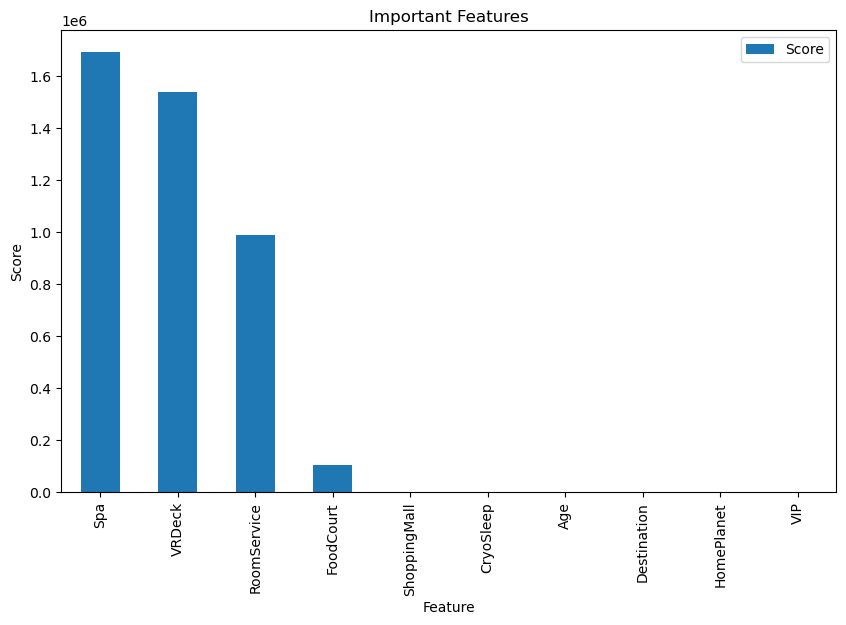

In [31]:
feature_scores.plot(kind='bar', figsize=(10,6), ylabel='Score',title='Important Features')
plt.savefig('figures/feature_analysis.png')

In [32]:
scaler = StandardScaler()
#scaler = Normalizer()
#scaler = RobustScaler()

In [33]:
#We are going to choose the main features to use for training dataset
main_features = list(feature_scores.index)[:5]
main_features

['Spa', 'VRDeck', 'RoomService', 'FoodCourt', 'ShoppingMall']

In [34]:
X_scaled = scaler.fit_transform(X[main_features])
test_df_scaled = scaler.fit_transform(test_df)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

X_train,X_test = X_train_scaled,X_test_scaled

In [36]:
def model_prediction(model,name,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    
    accuracy_train_score = round(accuracy_score(y_train,X_train_pred)*100,3)
    accuracy_test_score = round(accuracy_score(y_test,X_test_pred)*100,3)
    precision_score_ = round(precision_score(y_test,X_test_pred)*100,3)
    recall_score_ = round(recall_score(y_test,X_test_pred)*100,3)
    f1_score_ = round(f1_score(y_test,X_test_pred)*100,3)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",accuracy_train_score,'%')
    print(f"Accuracy_Score of {model} model on Testing Data is:",accuracy_test_score,'%')
    
    print(f"Precision Score of {model} model is:",precision_score_,'%')
    print(f"Recall Score of {model} model is:",recall_score_,'%')
    print(f"F1 Score of {model} model is:",f1_score_,'%')

    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,X_test_pred)
    cm = cm/ cm.astype(np.float).sum(axis=1)
    plt.figure(figsize=(7,3))
    sns.heatmap(cm,annot=True, fmt=".2f")
    plt.show()
    
    return accuracy_train_score,accuracy_test_score,precision_score_,recall_score_,f1_score_

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=len(main_features))
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

Accuracy_Score of LogisticRegression(C=100, random_state=60, solver='liblinear') model on Training Data is: 77.552 %
Accuracy_Score of LogisticRegression(C=100, random_state=60, solver='liblinear') model on Testing Data is: 77.516 %
Precision Score of LogisticRegression(C=100, random_state=60, solver='liblinear') model is: 72.106 %
Recall Score of LogisticRegression(C=100, random_state=60, solver='liblinear') model is: 90.297 %
F1 Score of LogisticRegression(C=100, random_state=60, solver='liblinear') model is: 80.182 %
Confusion Matrix of LogisticRegression(C=100, random_state=60, solver='liblinear') model is:


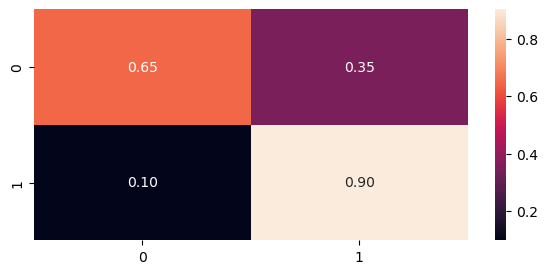

In [38]:
logistic_name = 'Logistic Regression Classifier'
log_model = LogisticRegression(C=100, penalty='l2', solver='liblinear', random_state=60)
logistic_accuracy_train_score,logistic_accuracy_test_score,logistic_precision_score,logistic_recall_score,logistic_f1_score=model_prediction(log_model,logistic_name,X_train, X_test, y_train, y_test)

# Random Forest Classifier

Accuracy_Score of RandomForestClassifier(max_depth=3, random_state=0) model on Training Data is: 77.423 %
Accuracy_Score of RandomForestClassifier(max_depth=3, random_state=0) model on Testing Data is: 76.826 %
Precision Score of RandomForestClassifier(max_depth=3, random_state=0) model is: 77.988 %
Recall Score of RandomForestClassifier(max_depth=3, random_state=0) model is: 75.228 %
F1 Score of RandomForestClassifier(max_depth=3, random_state=0) model is: 76.583 %
Confusion Matrix of RandomForestClassifier(max_depth=3, random_state=0) model is:


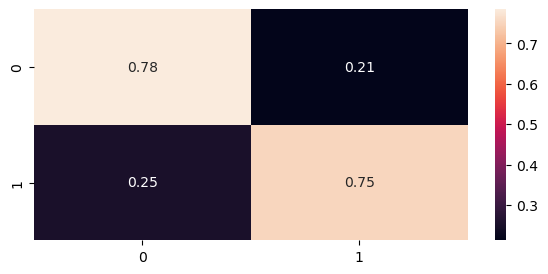

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfs_name = 'Random Forest Classifier'
rfs_model = RandomForestClassifier(max_depth=3, random_state=0)
rfs_accuracy_train_score,rfs_accuracy_test_score,rfs_precision_score,rfs_recall_score,rfs_f1_score=model_prediction(rfs_model,rfs_name,X_train, X_test, y_train, y_test)

# Support Vector Machine Classifier

Accuracy_Score of SVC(gamma='auto') model on Training Data is: 79.336 %
Accuracy_Score of SVC(gamma='auto') model on Testing Data is: 78.206 %
Precision Score of SVC(gamma='auto') model is: 74.056 %
Recall Score of SVC(gamma='auto') model is: 87.329 %
F1 Score of SVC(gamma='auto') model is: 80.147 %
Confusion Matrix of SVC(gamma='auto') model is:


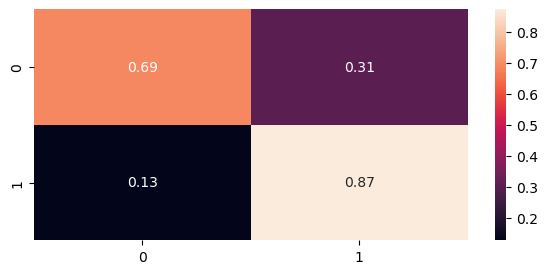

In [40]:
from sklearn.svm import SVC
svm_name = 'Support Vector Machine Classifier'
svm_model = SVC(gamma='auto')
svm_accuracy_train_score,svm_accuracy_test_score,svm_precision_score,svm_recall_score,svm_f1_score=model_prediction(svm_model,svm_name,X_train, X_test, y_train, y_test)

# K-NN Classifier

Accuracy_Score of KNeighborsClassifier(n_neighbors=7) model on Training Data is: 81.104 %
Accuracy_Score of KNeighborsClassifier(n_neighbors=7) model on Testing Data is: 76.768 %
Precision Score of KNeighborsClassifier(n_neighbors=7) model is: 73.695 %
Recall Score of KNeighborsClassifier(n_neighbors=7) model is: 83.79 %
F1 Score of KNeighborsClassifier(n_neighbors=7) model is: 78.419 %
Confusion Matrix of KNeighborsClassifier(n_neighbors=7) model is:


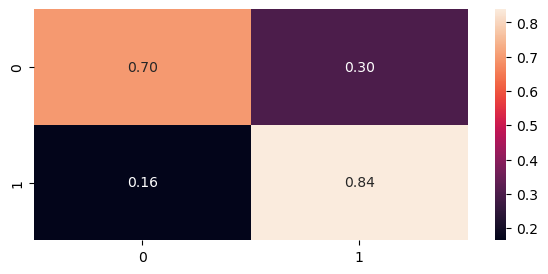

In [41]:
from sklearn.neighbors import KNeighborsClassifier
K = 7
knn_name = 'KNN Classifier'
knn_model = KNeighborsClassifier(n_neighbors=K)
knn_accuracy_train_score,knn_accuracy_test_score,knn_precision_score,knn_recall_score,knn_f1_score=model_prediction(knn_model,knn_name,X_train, X_test, y_train, y_test)

# Naive-Bayes Classifier

Accuracy_Score of MultinomialNB() model on Training Data is: 50.187 %
Accuracy_Score of MultinomialNB() model on Testing Data is: 49.166 %
Precision Score of MultinomialNB() model is: 49.115 %
Recall Score of MultinomialNB() model is: 25.342 %
F1 Score of MultinomialNB() model is: 33.434 %
Confusion Matrix of MultinomialNB() model is:


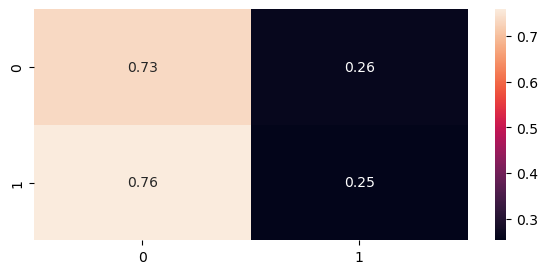

In [42]:
from sklearn.naive_bayes import MultinomialNB
X_scaled_naive = scaler.fit_transform(X[main_features])
test_df_scaled_naive = scaler.fit_transform(test_df[main_features])
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_scaled_naive,y,test_size=0.2,random_state=0)

X_train_naive, X_test_naive, y_train_naive, y_test_naive = np.abs(X_train_naive),np.abs(X_test_naive),np.abs(y_train_naive),np.abs(y_test_naive)
naive_model = MultinomialNB()

naive_name = 'Naive-Bayes Classifier'
naive_accuracy_train_score,naive_accuracy_test_score,naive_precision_score,naive_recall_score,naive_f1_score=model_prediction(naive_model,naive_name,X_train_naive, X_test_naive, y_train_naive, y_test_naive)

# Decision Tree Classifier

Accuracy_Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model on Training Data is: 78.07 %
Accuracy_Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model on Testing Data is: 76.136 %
Precision Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is: 71.089 %
Recall Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is: 88.699 %
F1 Score of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is: 78.923 %
Confusion Matrix of DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42) model is:


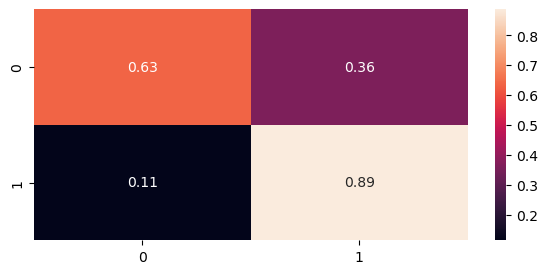

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_name = 'Decision Tree Classifier'
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_accuracy_train_score,dt_accuracy_test_score,dt_precision_score,dt_recall_score,dt_f1_score=model_prediction(dt_model,dt_name,X_train, X_test, y_train, y_test)
#dt_accuracy_train_score,dt_accuracy_test_score,dt_precision_score,dt_recall_score,dt_f1_score=model_prediction(DecisionTreeClassifier(random_state=0),dt_name,X_train, X_test, y_train, y_test)

In [44]:
training_score = [logistic_accuracy_train_score,rfs_accuracy_train_score,svm_accuracy_train_score,knn_accuracy_train_score,naive_accuracy_train_score,dt_accuracy_train_score]
testing_score = [logistic_accuracy_test_score,rfs_accuracy_test_score,svm_accuracy_test_score,knn_accuracy_test_score,naive_accuracy_test_score,dt_accuracy_test_score]
precision_score = [logistic_precision_score,rfs_precision_score,svm_precision_score,knn_precision_score,naive_precision_score,dt_precision_score]
recall_score = [logistic_recall_score,rfs_recall_score,svm_recall_score,knn_recall_score,naive_recall_score,dt_recall_score]
f1_score = [logistic_f1_score,rfs_f1_score,svm_f1_score,knn_f1_score,naive_f1_score,dt_f1_score]

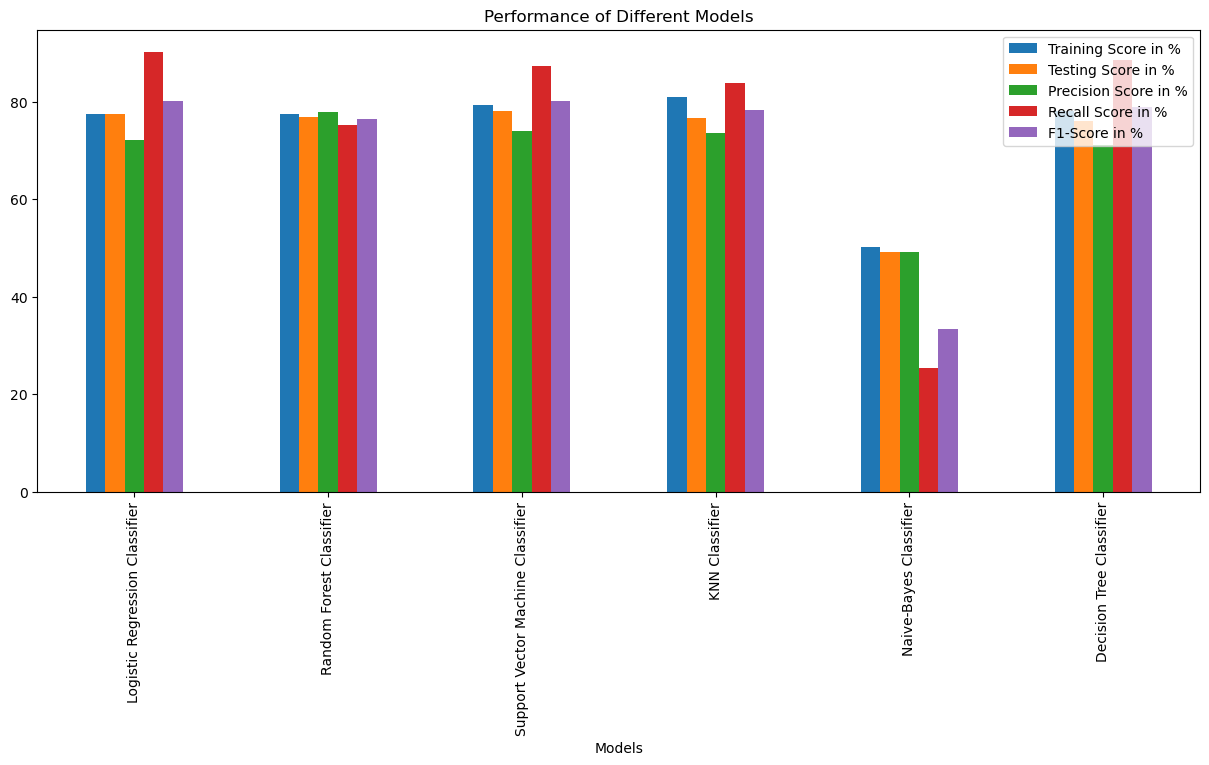

In [45]:
model_names = [logistic_name,rfs_name,svm_name,knn_name,naive_name,dt_name]
ml_df = pd.DataFrame({"Models":model_names,
                   "Training Score in %":training_score,
                   "Testing Score in %":testing_score,
                   'Precision Score in %':precision_score,
                    'Recall Score in %':recall_score,
                    'F1-Score in %':f1_score
                     })
ml_df.plot(x="Models",y=["Training Score in %","Testing Score in %",'Precision Score in %','Recall Score in %','F1-Score in %'], figsize=(15,6),kind="bar",
        title="Performance of Different Models")
plt.show()

# Submissions

In [46]:
#for submission process, go here: https://github.com/flatiron-school/BSC-DS-2022-spaceship-titanic/blob/main/kaggle_walkthrough.ipynb
model_types = [log_model,rfs_model,svm_model,knn_model,naive_model,dt_model]

In [47]:
test_df

HomePlanet  CryoSleep  Destination       Age  VIP  RoomService  \
0            1.0        1.0          0.0  27.00000  0.0          0.0   
1            1.0        0.0          0.0  19.00000  0.0          0.0   
2            0.0        1.0          2.0  31.00000  0.0          0.0   
3            0.0        0.0          0.0  38.00000  0.0          0.0   
4            1.0        0.0          0.0  20.00000  0.0         10.0   
...          ...        ...          ...       ...  ...          ...   
4272         1.0        1.0          0.0  34.00000  0.0          0.0   
4273         1.0        0.0          0.0  42.00000  0.0          0.0   
4274         2.0        1.0          2.0  28.82793  0.0          0.0   
4275         0.0        0.0          3.0  28.82793  0.0          0.0   
4276         1.0        1.0          1.0  43.00000  0.0          0.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0           0.0     0.0     0.0  
1           9.0           0.0  2823.0     0.0  
2           0.0           0.0     0.0     0.0  
3        6652.0           0.0   181.0   585.0  
4           0.0         635.0     0.0     0.0  
...         ...           ...     ...     ...  
4272        0.0           0.0     0.0     0.0  
4273      847.0          17.0    10.0   144.0  
4274        0.0           0.0     0.0     0.0  
4275     2680.0           0.0     0.0   523.0  
4276        0.0           0.0     0.0     0.0  

[4277 rows x 10 columns]

In [48]:
testing_main = test_df[main_features]
len(testing_main)

4277

In [49]:
final_test = testing_main.copy()

In [50]:
for name,model in zip(model_names,model_types):
    temp = model.predict(testing_main)
    final_test[name+' Prediction'] = temp

In [51]:
final_test

Spa  VRDeck  RoomService  FoodCourt  ShoppingMall  \
0        0.0     0.0          0.0        0.0           0.0   
1     2823.0     0.0          0.0        9.0           0.0   
2        0.0     0.0          0.0        0.0           0.0   
3      181.0   585.0          0.0     6652.0           0.0   
4        0.0     0.0         10.0        0.0         635.0   
...      ...     ...          ...        ...           ...   
4272     0.0     0.0          0.0        0.0           0.0   
4273    10.0   144.0          0.0      847.0          17.0   
4274     0.0     0.0          0.0        0.0           0.0   
4275     0.0   523.0          0.0     2680.0           0.0   
4276     0.0     0.0          0.0        0.0           0.0   

      Logistic Regression Classifier Prediction  \
0                                             0   
1                                             0   
2                                             0   
3                                             1   
4                                             1   
...                                         ...   
4272                                          0   
4273                                          1   
4274                                          0   
4275                                          1   
4276                                          0   

      Random Forest Classifier Prediction  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
4272                                    0   
4273                                    0   
4274                                    0   
4275                                    0   
4276                                    0   

      Support Vector Machine Classifier Prediction  KNN Classifier Prediction  \
0                                                0                          0   
1                                                0                          0   
2                                                0                          0   
3                                                0                          1   
4                                                0                          1   
...                                            ...                        ...   
4272                                             0                          0   
4273                                             0                          1   
4274                                             0                          0   
4275                                             0                          1   
4276                                             0                          0   

      Naive-Bayes Classifier Prediction  Decision Tree Classifier Prediction  
0                                     1                                    1  
1                                     0                                    0  
2                                     1                                    1  
3                                     1                                    0  
4                                     1                                    1  
...                                 ...                                  ...  
4272                                  1                                    1  
4273                                  1                                    0  
4274                                  1                                    1  
4275                                  1                                    1  
4276                                  1                                    1  

[4277 rows x 11 columns]

In [52]:
submission = testing_main.to_csv('submissions/predicted_results.csv')

# References:

https://github.com/kumod007/Titanic-Spaceship-Kaggle-Competition-End-To-End-Project/blob/main/titanic-spaceship-competition-end-to-end-project%20(2).ipynb

https://github.com/MalayAgr/Kaggle-Spaceship-Titanic/blob/main/logistic_regression_baselines.ipynb

https://www.youtube.com/watch?v=mSusDGZhkVU